# Обучение модели

In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('new_features.csv')

In [15]:
df['from'].value_counts()

Delhi        61343
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: from, dtype: int64

In [16]:
real_columns = ['is_econom', 'taken_time_minues', 'distance', 'speed', 'week_day', 'dep_minutes', 'stop_count']
cat_columns = ['new_airlines']

target = 'price'

In [29]:
df.new_airlines.value_counts()

Vistara      127859
Air India     80892
Other         48388
Indigo        43120
Name: new_airlines, dtype: int64

In [27]:
real_columns + cat_columns

['is_econom',
 'taken_time_minues',
 'distance',
 'speed',
 'week_day',
 'dep_minutes',
 'stop_count',
 'new_airlines']

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
target_transformer_lnr = TransformedTargetRegressor(
    regressor= LinearRegression(),
    func=np.log, inverse_func=np.exp
)

target_transformer_rfr = TransformedTargetRegressor(
    regressor= RandomForestRegressor(),
    func=np.log, inverse_func=np.exp
)

transformer = ColumnTransformer([
    ('real', StandardScaler(), real_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns),
])

pipe_lnr = Pipeline([
    ('transfromer', transformer),
    ('poly', PolynomialFeatures()),
    ('model', target_transformer_lnr)
])

pipe_rfr = Pipeline([
    ('transfromer', transformer),
    ('poly', PolynomialFeatures()),
    ('model', target_transformer_rfr)
])

In [19]:
def train_to_df(X_train, y_train):
    pipe_rfr = Pipeline([
        ('transfromer', transformer),
        ('model', target_transformer_rfr)
    ])
    pipe_rfr.fit(X_train, y_train)
    print('mae:', mean_absolute_error(y_test, pipe_rfr.predict(X_test)))
    print('mse:', mean_squared_error(y_test, pipe_rfr.predict(X_test)))
    
    return pipe_rfr

Выбор test_size

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(target, axis=1),
    df[target],
    test_size=0.3,
    random_state=42,
)

In [21]:
pipe_lnr.fit(X_train, y_train)

Pipeline(steps=[('transfromer',
                 ColumnTransformer(transformers=[('real', StandardScaler(),
                                                  ['is_econom',
                                                   'taken_time_minues',
                                                   'distance', 'speed',
                                                   'week_day', 'dep_minutes',
                                                   'stop_count']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['new_airlines'])])),
                ('poly', PolynomialFeatures()),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=LinearRegression()))])

In [22]:
import joblib

In [24]:
pipe_lnr

Pipeline(steps=[('transfromer',
                 ColumnTransformer(transformers=[('real', StandardScaler(),
                                                  ['is_econom',
                                                   'taken_time_minues',
                                                   'distance', 'speed',
                                                   'week_day', 'dep_minutes',
                                                   'stop_count']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['new_airlines'])])),
                ('poly', PolynomialFeatures()),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=LinearRegression()))])

In [23]:
joblib.dump(pipe_lnr, 'pipe_lnr.joblib')

['pipe_lnr.joblib']

In [19]:
pipe_rfr.fit(X_train, y_train)

Pipeline(steps=[('transfromer',
                 ColumnTransformer(transformers=[('real', StandardScaler(),
                                                  ['is_econom',
                                                   'taken_time_minues',
                                                   'distance', 'speed',
                                                   'week_day', 'dep_minutes',
                                                   'stop_count']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['new_airlines'])])),
                ('poly', PolynomialFeatures()),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor()))])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
print('mae:', mean_absolute_error(y_test, pipe_rfr.predict(X_test)))
print('mse:', mean_squared_error(y_test, pipe_rfr.predict(X_test)))

mae: 2207.4307698288458
mse: 14473202.448912326


In [25]:
print('mae:', mean_absolute_error(y_test, pipe_lnr.predict(X_test)))
print('mse:', mean_squared_error(y_test, pipe_lnr.predict(X_test)))

mae: 3786.9788397194775
mse: 34775480.83738604


In [28]:
test_predicted = pipe_rfr.predict(X_test)

<AxesSubplot:ylabel='price'>

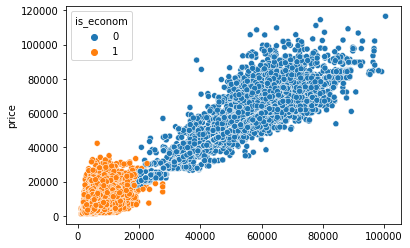

In [29]:
sns.scatterplot(x=test_predicted, y=y_test, hue=X_test.is_econom)

Feature importances

In [164]:
pipe_rfr.named_steps['transfromer'].get_feature_names_out()

array(['real__is_econom', 'real__taken_time_minues', 'real__distance',
       'real__speed', 'real__week_day', 'real__dep_minutes',
       'real__stop_count', 'cat__new_airlines_Air India',
       'cat__new_airlines_Indigo', 'cat__new_airlines_Other',
       'cat__new_airlines_Vistara'], dtype=object)

In [156]:
X_train[cat_columns].new_airlines.sort_values().unique()

array(['Air India', 'Indigo', 'Other', 'Vistara'], dtype=object)

In [157]:
features_names = real_columns + ['Air India', 'Indigo', 'Other', 'Vistara']

In [165]:
features_names = pipe_rfr.named_steps['transfromer'].get_feature_names_out()

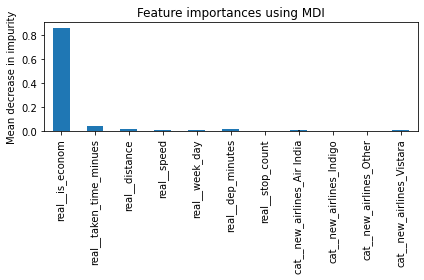

In [166]:
get_random_forest_feature_importances(
    pipe_rfr.named_steps['model'].regressor_,
    features_names
)

### Композиция моделей (Не получилось)

In [124]:
model_econom = train_to_df(X_train[X_train.is_econom == 1], y_train[X_train.is_econom == 1])
model_business = train_to_df(X_train[X_train.is_econom == 0], y_train[X_train.is_econom == 0])

mae: 15588.863428736859
mse: 693850443.5016571
mae: 29142.209061698864
mse: 1278242614.6820624


In [125]:
test_enonom_predicted = model_econom.predict(X_test[X_test.is_econom == 1])
test_business_predicted = model_business.predict(X_test[X_test.is_econom == 0])

In [126]:
X_test.loc[X_test.is_econom == 1, 'predicted_price'] = test_enonom_predicted
X_test.loc[X_test.is_econom == 0, 'predicted_price'] = test_business_predicted

In [127]:
print('mae:', mean_absolute_error(y_test, X_test['predicted_price']))
print('mse:', mean_squared_error(y_test, X_test['predicted_price']))

mae: 29142.209061698864
mse: 1278242614.6820624


In [62]:
importances = pipe_rfr.named_steps['model'].feature_importances_
std = np.std([tree.feature_importances_ for tree in pipe_rfr.named_steps['model'].estimators_], axis=0)

/Users/michil/.virtualenvs/base/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


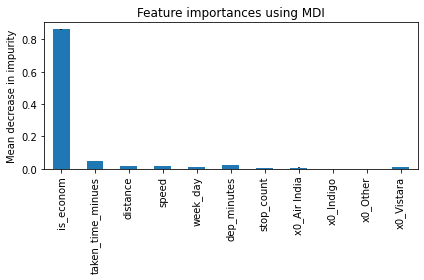

In [63]:
feature_names = real_columns + pipe_rfr.named_steps['transfromer'].transformers_[1][1].get_feature_names().tolist()
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()